In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from yellowbrick.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from yellowbrick.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, make_scorer
import warnings
import seaborn as sns
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
#load dataset
data = pd.read_csv('diabetes.csv')

# Extracting Attributes / Features
X=data.drop(["Outcome"],axis=1)

# Extracting Target / Class Labels
y=data["Outcome"]
#divide to train and test split
x_train,x_test, y_train, y_test=train_test_split(X,y,test_size=0.30)
#define soc formula for SVM 
def get_soc_svm(kernel,sp,p):
    if kernel=='rbf':
        return sp*(3*p+3)
    if kernel == 'linear':
        return sp*(2*p+1)
    if kernel == 'poly':
        return sp*(2*p+3+2)
    
    return sp*(2*p+12)

In [ ]:
k=X.shape[1]

gammas = [ 1.0e-07, 7.7e-07, 5.9e-06, 1.00000000e-05, 2.97635144e-05, 4.28133240e-05, 8.85866790e-05,
           1.27427499e-04, 1.83298071e-04, 2.15443469e-04, 3.79269019e-04, 
           7.84759970e-04, 1.00000000e-03, 4.64158883e-03, 8.85866790e-03,
           1.00000000e-02, 2.15443469e-02, 4.64158883e-02, 6.15848211e-02, 
           1.62377674e-01, 4.28133240e-01, 8.85866790e-01, 1.12883789e+00, 
           2.97635144e+00, 7.84759970e+00, 2.06913808e+01, 5.45559478e+01, 
           1.43844989e+02, 3.79269019e+02, 7.86269019e+02, 1.00000000e+03]
cs=[1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01, 2.78255940e-01, 7.74263683e-01, 2.15443469e+00,
       5.99484250e+00, 1.66810054e+01, 4.64158883e+01, 1.29154967e+02,
       3.59381366e+02, 1.00000000e+03]
list_C=[]
list_gamma=[]
min_soc = 1000000
min_gamma=100000
min_c = 100000
socs = np.array([])
accuracies=np.array([])
colors=np.array([])
minAccuracy=0.001
rows_list = []
for C in cs:
    for gamma in gammas:
        for kernel_type in ['rbf','linear','sigmoid']:
            model = SVC(C=C,gamma=gamma,kernel=kernel_type)
            model.fit(X,y)
            soc = get_soc_svm(model.kernel,len(model.support_vectors_),k)
            if min_soc>soc:
                min_soc = soc
                min_soc_gamma=gamma
                min_soc_C = C
                min_soc_sp = len(model.support_vectors_)
            socs = np.append(socs,soc)
            accuracy = cross_val_score(model,X,y,cv=5,scoring='accuracy')
            accuracy=np.abs(np.mean(accuracy))
            accuracies = np.append(accuracies,accuracy)
            dics_val = {'SOC':soc, 'param_C': C, 'param_gamma':gamma}
            rows_list.append(dics_val)



min SOC:  5185.0  corresponding accuracy:  0.770902300314065


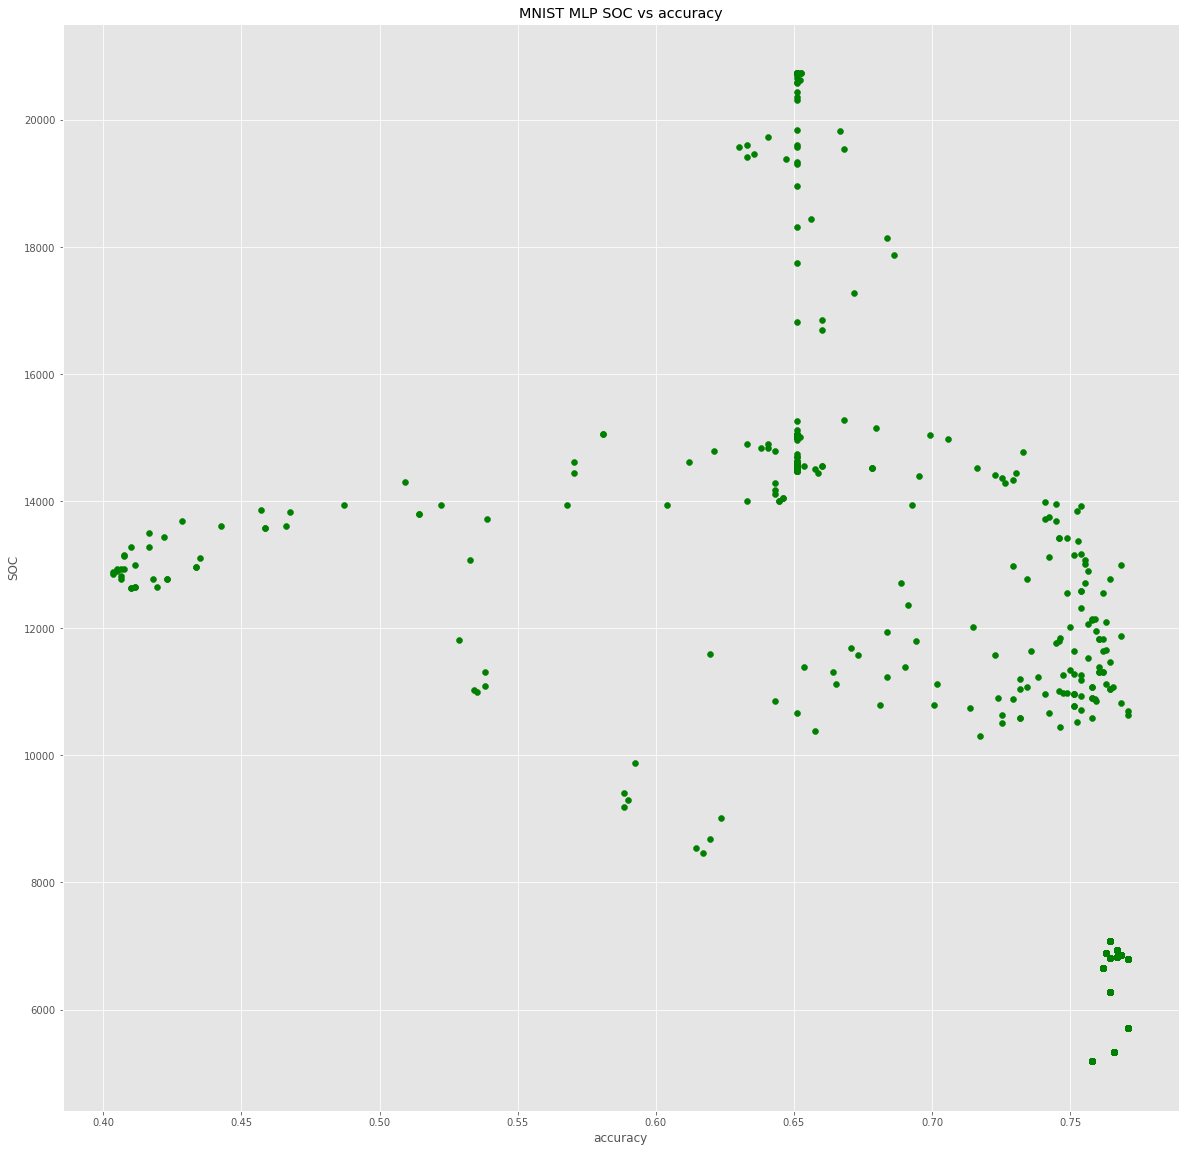

In [24]:

plt.style.use('ggplot')
colors=np.array([])
colors=np.append(colors,'green')
max_acc = max(accuracies)
min_soc = min(socs)

plt.figure(figsize=(20,20))
plt.title('MNIST MLP SOC vs accuracy')
plt.scatter(accuracies,socs,c=colors)
plt.xlabel('accuracy')
plt.ylabel('SOC')
plt.style.use('ggplot')
print('min SOC: ',min_soc,' corresponding accuracy: ',max_acc)
plt.rcParams.update({'font.size': 22})
plt.show()